<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/Time_Series_Google_Stock_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series - Google Stock Price Forecasting

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraries

## Install - Update

Steps:
- Uncomment the cell below (code for installing & updating packages)
- Run the cell
- Restart the runtime (on google colab)
- Comment the cell below (code for installing & updating packages)
- Run all the code

In [ ]:
# !pip install mplfinance

# !pip install --upgrade pandas
# !pip install --upgrade numpy
# !pip install --upgrade scikit-learn
# !pip install --upgrade matplotlib
# !pip install --upgrade seaborn

## Import

In [ ]:
import numpy as np
import pandas as pd

import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.preprocessing import MinMaxScaler

# Dataset Overview

## Reading Dataset

In [ ]:
path_train = 'https://raw.githubusercontent.com/adhang/datasets/main/google-stock-price-train.csv'
path_test = 'https://raw.githubusercontent.com/adhang/datasets/main/google-stock-price-test.csv'

data_train = pd.read_csv(path_train, index_col='Date', parse_dates=True)
data_test = pd.read_csv(path_test, index_col='Date', parse_dates=True)

In [ ]:
data_train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


## Duplicate Values

In [ ]:
data_train.duplicated().sum()

0

In [ ]:
data_test.duplicated().sum()

0

## Basic Info

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


As we can see, the `Close` and `Volume` columns have `object` data type. We have to convert it to numeric.

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


As we can see, the `Volume` column has `object` data type. We have to convert it to numeric.

## Change Data Type

### Train Data

In [ ]:
data_train.dtypes

Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [ ]:
data_train['Close'] = data_train['Close'].str.replace(',','').astype(float)
data_train['Volume'] = data_train['Volume'].str.replace(',','').astype(float)

In [ ]:
data_train.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

### Test Data

In [ ]:
data_test.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [ ]:
data_test['Volume'] = data_test['Volume'].str.replace(',','').astype(float)

In [ ]:
data_test.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

# EDA

## Descriptive Statistics

In [ ]:
data_train.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


In [ ]:
data_test.describe()

,Open,High,Low,Close,Volume
count,20.000000,20.000000,20.000000,20.000000,2.000000e+01
mean,807.526000,811.926500,801.949500,807.904500,1.659895e+06
std,15.125428,14.381198,13.278607,13.210088,6.774747e+05
min,778.810000,789.630000,775.800000,786.140000,9.193000e+05
25%,802.965000,806.735000,797.427500,802.282500,1.248500e+06
50%,806.995000,808.640000,801.530000,806.110000,1.418050e+06
75%,809.560000,817.097500,804.477500,810.760000,1.743400e+06
max,837.810000,841.950000,827.010000,835.670000,3.246600e+06


## Candle Stick Plot

### 2012 - 2013

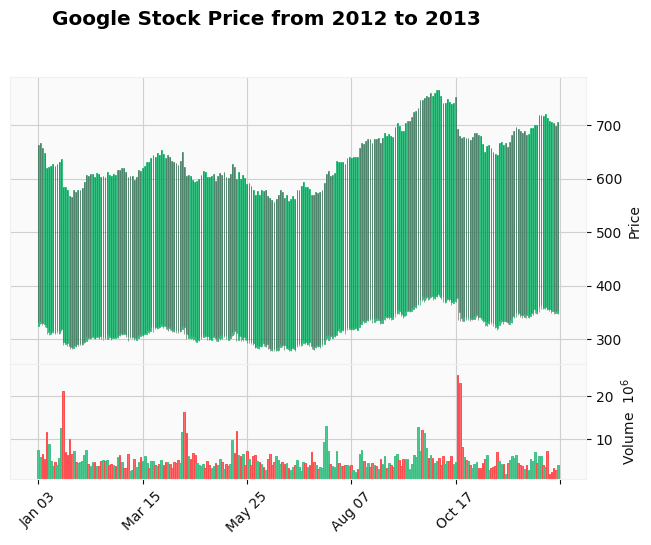

In [ ]:
mpf.plot(data_train['2012-01-01':'2013-01-01'],
         type='candle', style='yahoo', volume=True,
         title='Google Stock Price from 2012 to 2013')

### 2013 - 2014

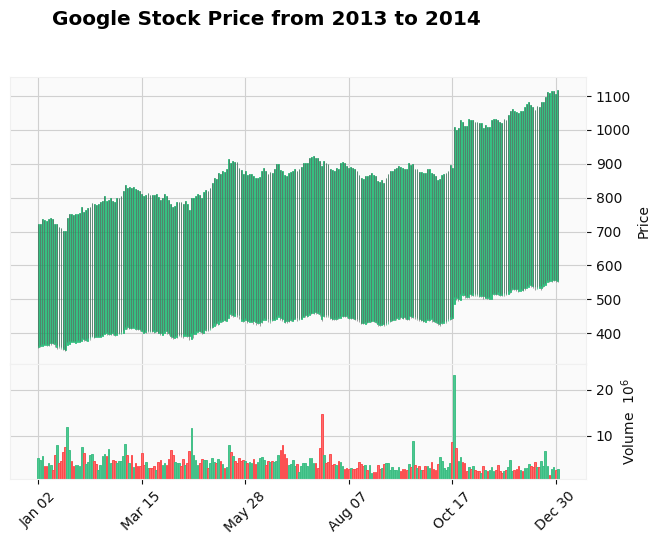

In [ ]:
mpf.plot(data_train['2013-01-01':'2014-01-01'],
         type='candle', style='yahoo', volume=True,
         title='Google Stock Price from 2013 to 2014')

### 2014 - 2015

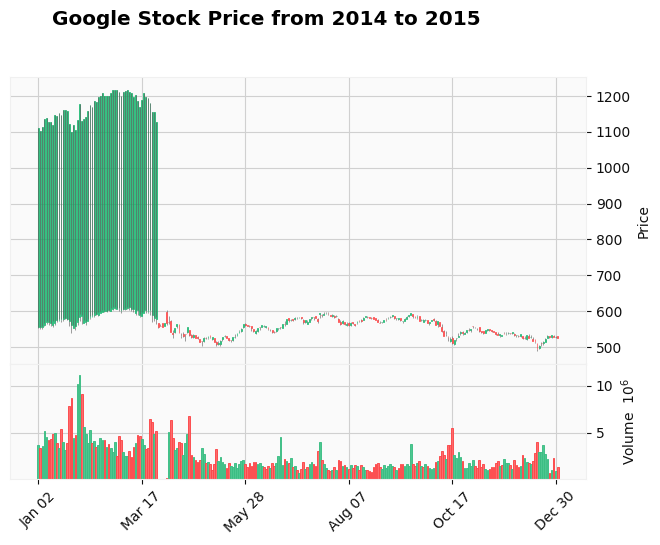

In [ ]:
mpf.plot(data_train['2014-01-01':'2015-01-01'],
         type='candle', style='yahoo', volume=True,
         title='Google Stock Price from 2014 to 2015')

### 2015 - 2016

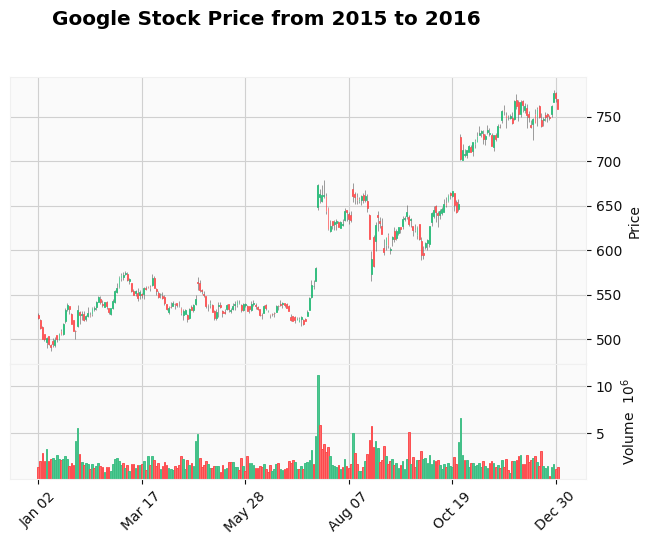

In [ ]:
mpf.plot(data_train['2015-01-01':'2016-01-01'],
         type='candle', style='yahoo', volume=True,
         title='Google Stock Price from 2015 to 2016')

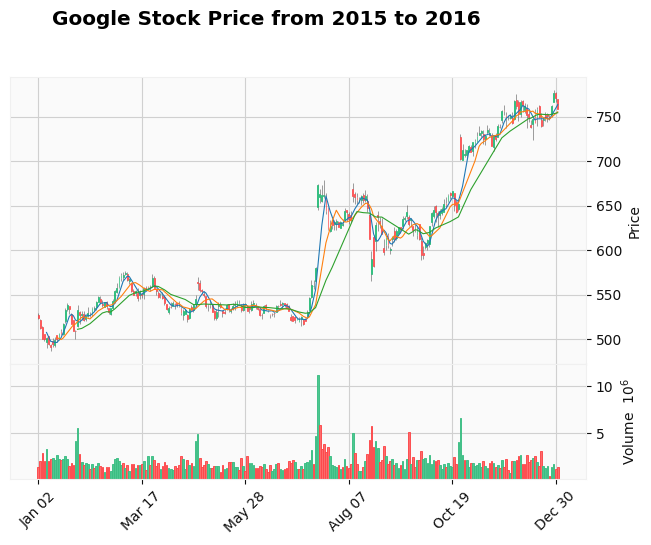

In [ ]:
mpf.plot(data_train['2015-01-01':'2016-01-01'],
         type='candle', style='yahoo', volume=True,
         title='Google Stock Price from 2015 to 2016',
         mav=[5,10,20])

## Without Moving Average

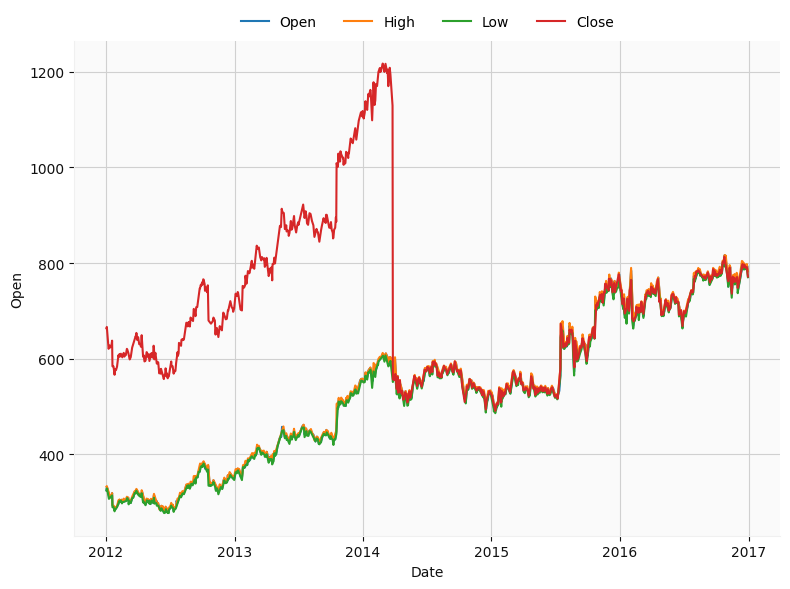

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Open', ax=ax)
sns.lineplot(x=data_train.index, y=data_train['High'], label='High', ax=ax)
sns.lineplot(x=data_train.index, y=data_train['Low'], label='Low', ax=ax)
sns.lineplot(x=data_train.index, y=data_train['Close'], label='Close', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=4, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

## Simple Moving Average (SMA)

### Weekly

In [ ]:
data_train.rolling(window=7).mean().head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


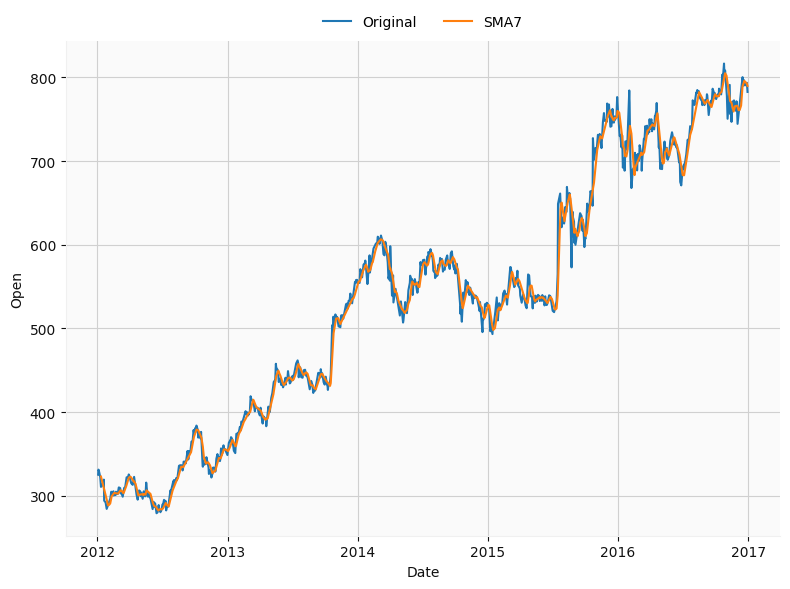

In [ ]:
tmp = data_train.rolling(window=7).mean()

_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Original', ax=ax)
sns.lineplot(x=tmp.index, y=tmp['Open'], label='SMA7', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

### Monthly

In [ ]:
data_train.rolling(window=30).mean().tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-16,770.437667,777.689667,763.345000,770.435333,1.969010e+06
2016-12-19,771.756333,778.599667,764.535333,771.508000,1.938920e+06
2016-12-20,772.498333,779.048333,765.226000,771.971333,1.917783e+06
2016-12-21,772.913000,779.083333,765.456333,772.106333,1.912597e+06
2016-12-22,773.327000,779.153000,766.020000,772.304667,1.858100e+06
2016-12-23,773.318000,779.205333,767.190000,773.216333,1.720707e+06
2016-12-27,774.456000,780.441333,768.432667,774.467333,1.665950e+06
2016-12-28,775.726000,781.654000,770.288000,776.099667,1.582597e+06
2016-12-29,776.938000,782.371000,771.353000,776.909667,1.527940e+06


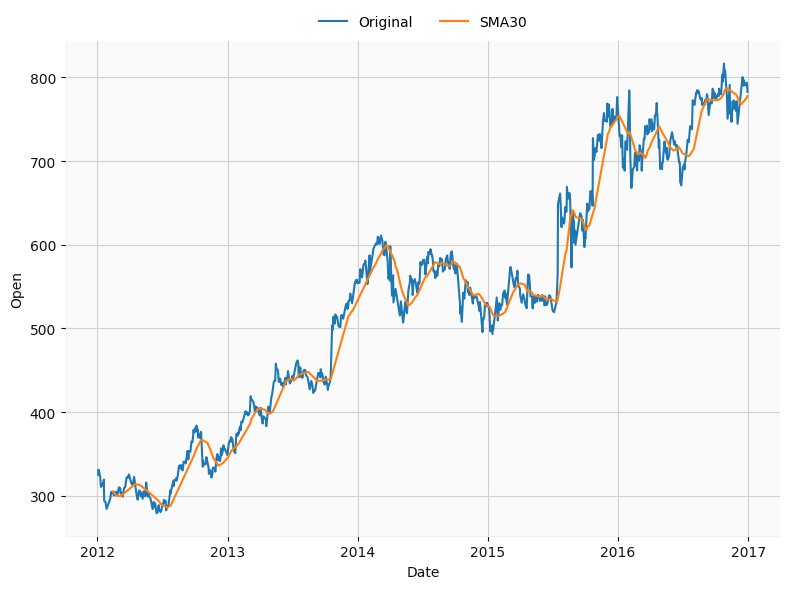

In [ ]:
tmp = data_train.rolling(window=30).mean()

_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Original', ax=ax)
sns.lineplot(x=tmp.index, y=tmp['Open'], label='SMA30', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

### Multiple

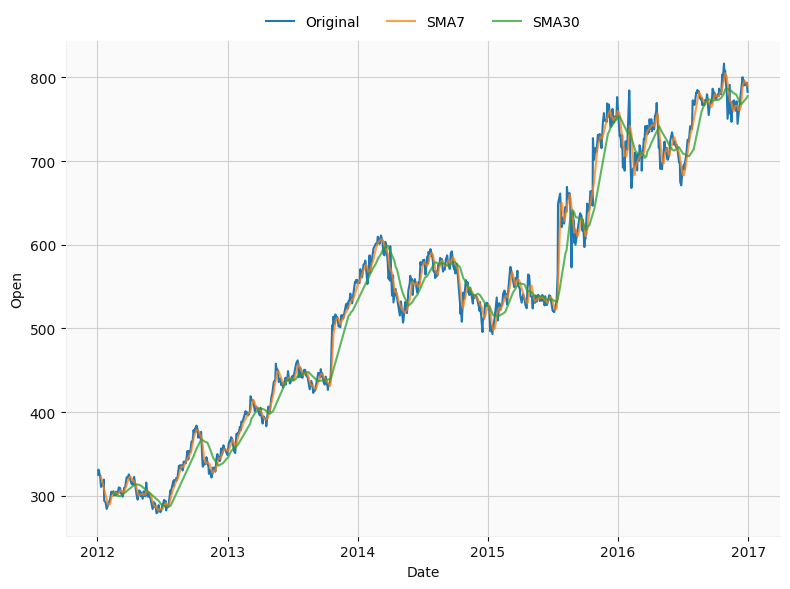

In [ ]:
sma_7 = data_train.rolling(window=7).mean()
sma_30 = data_train.rolling(window=30).mean()

_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Original', ax=ax)
sns.lineplot(x=sma_7.index, y=sma_7['Open'], label='SMA7', ax=ax, alpha=0.75)
sns.lineplot(x=sma_30.index, y=sma_30['Open'], label='SMA30', ax=ax, alpha=0.75)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

## Cumulative Moving Average (CMA)

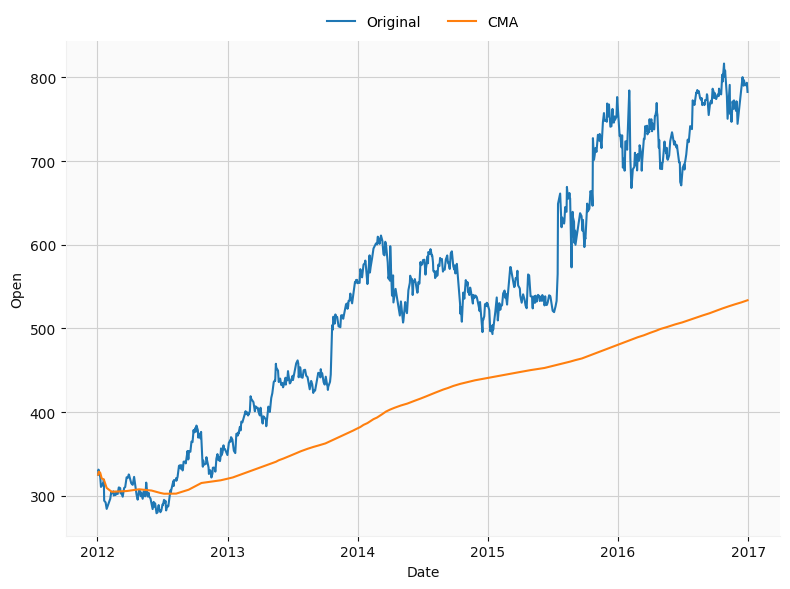

In [ ]:
cma_1 = data_train.expanding(min_periods=1).mean()

_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Original', ax=ax)
sns.lineplot(x=cma_1.index, y=cma_1['Open'], label='CMA', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

## Exponential Moving Average (EMA)

Pandas has an Exponential Weighted Moving Average (EWMA) method

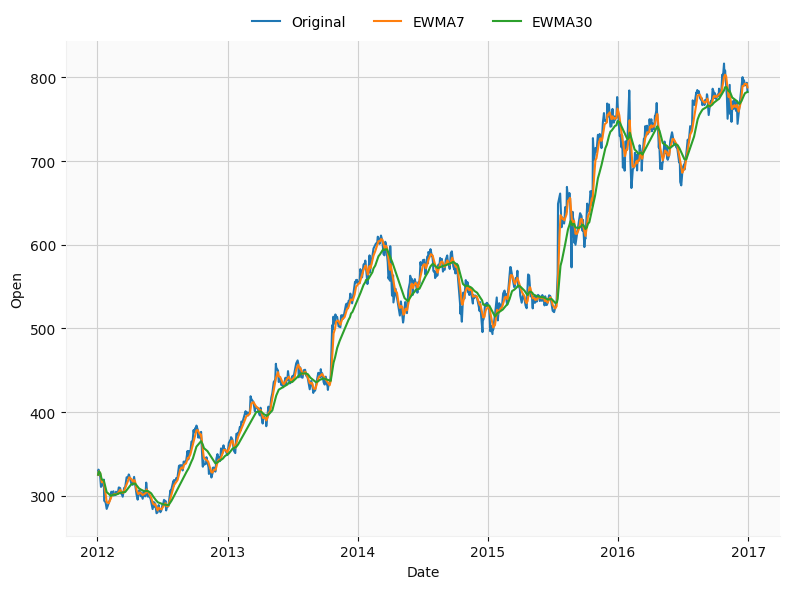

In [ ]:
ewma_7 = data_train.ewm(span=7).mean()
ewma_30 = data_train.ewm(span=30).mean()

_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train.index, y=data_train['Open'], label='Original', ax=ax)
sns.lineplot(x=ewma_7.index, y=ewma_7['Open'], label='EWMA7', ax=ax)
sns.lineplot(x=ewma_30.index, y=ewma_30['Open'], label='EWMA30', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=3, frameon=False)

sns.despine()
plt.tight_layout()
plt.show()

# Data Preparation

## Normalization

In [ ]:
data_train_scaled = data_train.copy()
data_test_scaled = data_test.copy()

# create scaler dict
scaler = {f'{col}_scaler':'null' for col in data_train.columns}

for col in data_train.columns:
  scaler[f'{col}_scaler'] = MinMaxScaler(feature_range=(0,1))

  # always fit on train dataset
  scaler[f'{col}_scaler'].fit(data_train_scaled[[col]])

  data_train_scaled[col] = scaler[f'{col}_scaler'].transform(data_train_scaled[[col]])
  data_test_scaled[col] = scaler[f'{col}_scaler'].transform(data_test_scaled[[col]])

In [ ]:
scaler

{'Close_scaler': MinMaxScaler(),
 'High_scaler': MinMaxScaler(),
 'Low_scaler': MinMaxScaler(),
 'Open_scaler': MinMaxScaler(),
 'Volume_scaler': MinMaxScaler()}

In [ ]:
data_train_scaled.shape[0]

1258

## Feature and Target

In [ ]:
data_train_open = data_train_scaled['Open'].copy()
data_test_open = data_test_scaled['Open'].copy()

timestamp = 60

In [ ]:
data_train_open.shape

(1258,)

In [ ]:
data_test_open.shape

(20,)

### Train Dataset

In [ ]:
X_train = list()
y_train = list()

for i in range(timestamp, data_train_open.shape[0]):
  # x (feature) is a set of values in a given timestamp (ex: the 1st to 59th data)
  X_train.append(data_train_open[i-timestamp:i].values.tolist())

  # y (target) is the next value to be predicted (ex: the 60-th data)
  y_train.append(data_train_open[i])

# convert to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)

# reshape array
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

### Test Dataset

In [ ]:
data_concat = pd.concat([data_train_open, data_test_open], axis=0)

# trim the last timestamp (60) plus data test size (20)
data_concat_trim = data_concat[len(data_concat)-len(data_test_open)-timestamp:]

X_test = list()
y_test = list()

for i in range(timestamp, data_concat_trim.shape[0]):
  # x (feature) is a set of values in a given timestamp (ex: the 1st to 59th data)
  X_test.append(data_concat_trim[i-timestamp:i].values.tolist())

  # y (target) is the next value to be predicted (ex: the 60-th data)
  y_test.append(data_concat_trim[i])

# convert to numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape array
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Model Development (Unidirectional, SGD)

## Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 60, 64)            16896     
                                                                 
 dropout_27 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_28 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dropout_28 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_29 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                

## Compile

I will use the Huber loss function. Read more about MSE, MAE, and Huber loss function [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss='huber',
              optimizer=optimizer,
              metrics=['mae'])

## Fit

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 6s 55ms/step - loss: 0.1305 - mae: 0.4413 - val_loss: 0.3688 - val_mae: 0.8584
Epoch 2/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0969 - mae: 0.3695 - val_loss: 0.2986 - val_mae: 0.7724
Epoch 3/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0727 - mae: 0.3153 - val_loss: 0.2450 - val_mae: 0.6995
Epoch 4/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0565 - mae: 0.2765 - val_loss: 0.2046 - val_mae: 0.6391
Epoch 5/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0454 - mae: 0.2476 - val_loss: 0.1737 - val_mae: 0.5888
Epoch 6/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0387 - mae: 0.2294 - val_loss: 0.1507 - val_mae: 0.5484
Epoch 7/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0340 - mae: 0.2150 - val_loss: 0.1328 - val_mae: 0.5148
Epoch 8/200
38/38 [==============================] - 0s 12ms/step - loss: 0.

## History

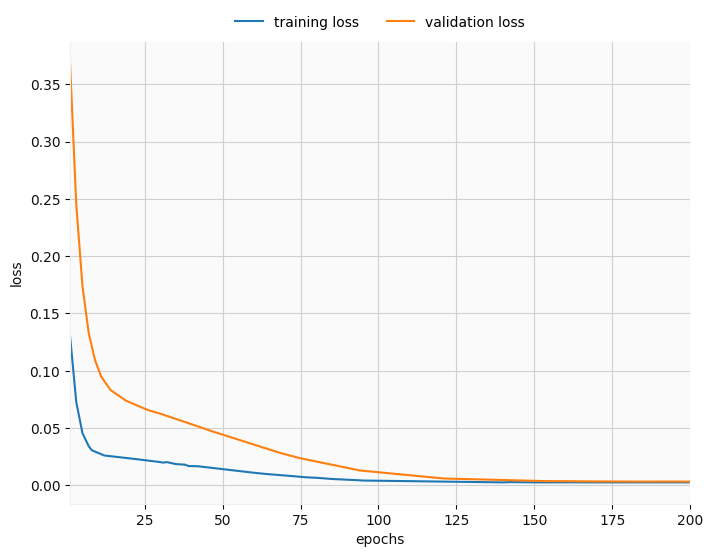

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'],
              label='training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'],
              label='validation loss', ax=ax)

ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

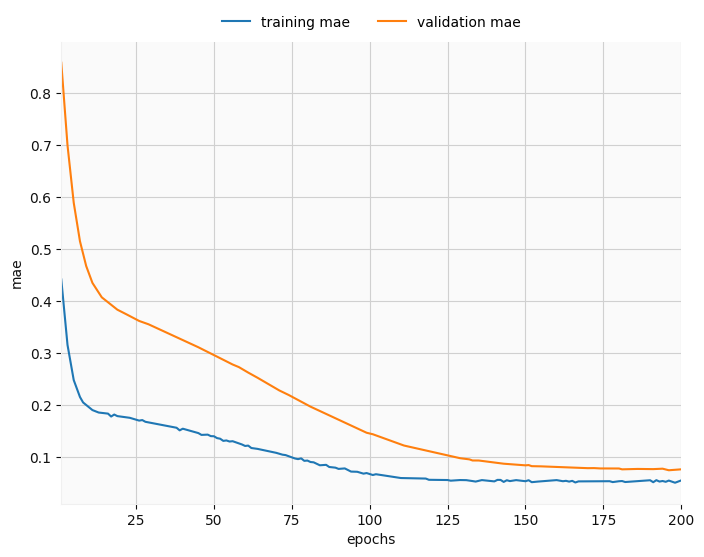

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['mae'])+1)

sns.lineplot(x=epochs, y=history.history['mae'],
              label='training mae', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_mae'],
              label='validation mae', ax=ax)

ax.set_ylabel('mae')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Evaluate

In [ ]:
eval = model.evaluate(X_test, y_test)

print(f'loss\t: {eval[0]:.3f}')
print(f'mae\t: {eval[1]:.3f}')

1/1 [==============================] - 0s 25ms/step - loss: 0.0031 - mae: 0.0759
loss	: 0.003
mae	: 0.076


## Prediction on Train Data

In [ ]:
y_pred = model.predict(X_train)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_train_inverse = scaler['Open_scaler'].inverse_transform(y_train.reshape(-1,1))

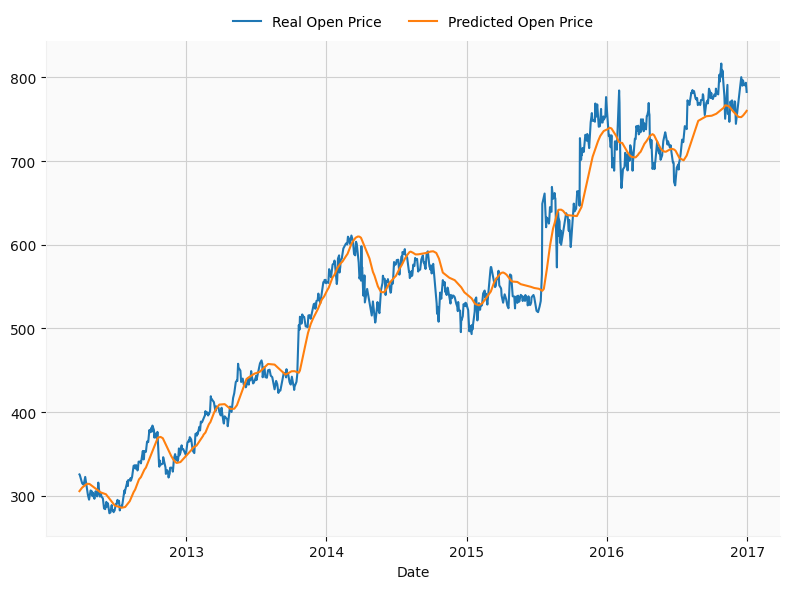

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train[60:].index, y=y_train_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_train[60:].index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
# ax.set_xticks(data_train[60:].index.date)
# ax.set_xticklabels(labels=data_train[60:].index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

## Prediction on Test Data

In [ ]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_test_inverse = scaler['Open_scaler'].inverse_transform(y_test.reshape(-1,1))

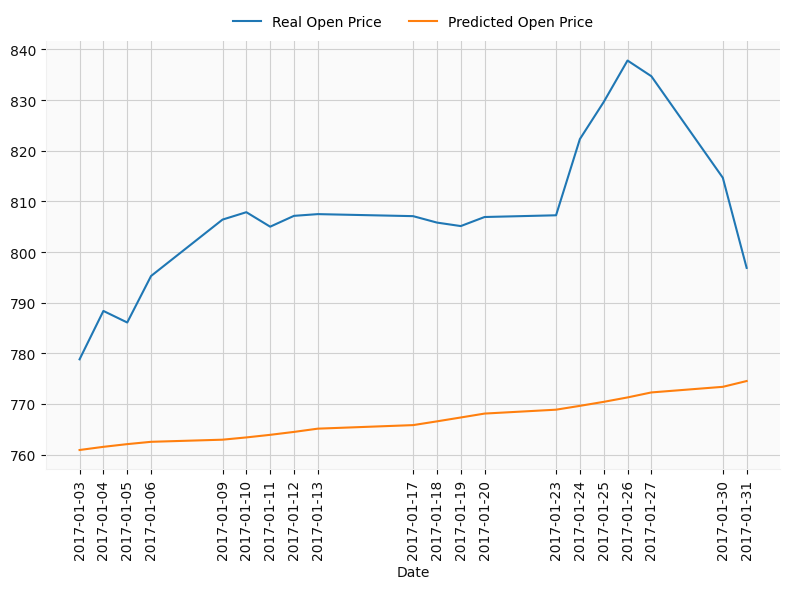

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_test.index, y=y_test_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_test.index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
ax.set_xticks(data_test.index.date)
ax.set_xticklabels(labels=data_test.index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

# Model Development (Unidirectional, Adam)

## Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64, return_sequences=False),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 60, 64)            16896     
                                                                 
 dropout_30 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_31 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dropout_31 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_32 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_32 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)               

## Compile

I will use the Huber loss function. Read more about MSE, MAE, and Huber loss function [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss='huber',
              optimizer='adam',
              metrics=['mae'])

## Fit

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 5s 41ms/step - loss: 0.0206 - mae: 0.1363 - val_loss: 4.0454e-04 - val_mae: 0.0239
Epoch 2/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0024 - mae: 0.0517 - val_loss: 3.9439e-04 - val_mae: 0.0237
Epoch 3/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0020 - mae: 0.0478 - val_loss: 0.0024 - val_mae: 0.0656
Epoch 4/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0023 - mae: 0.0492 - val_loss: 0.0027 - val_mae: 0.0693
Epoch 5/200
38/38 [==============================] - 0s 11ms/step - loss: 0.0021 - mae: 0.0477 - val_loss: 0.0012 - val_mae: 0.0438
Epoch 6/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0018 - mae: 0.0446 - val_loss: 3.6038e-04 - val_mae: 0.0225
Epoch 7/200
38/38 [==============================] - 0s 12ms/step - loss: 0.0017 - mae: 0.0433 - val_loss: 0.0017 - val_mae: 0.0532
Epoch 8/200
38/38 [==============================] - 0s 12ms/ste

## History

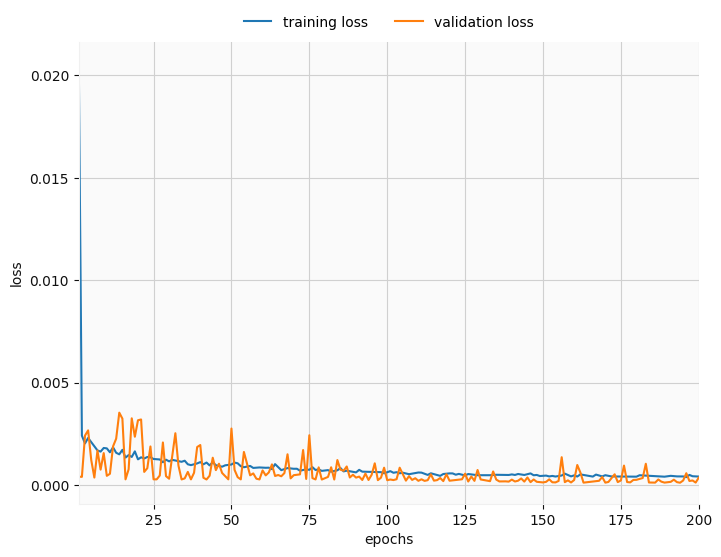

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'],
              label='training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'],
              label='validation loss', ax=ax)

ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

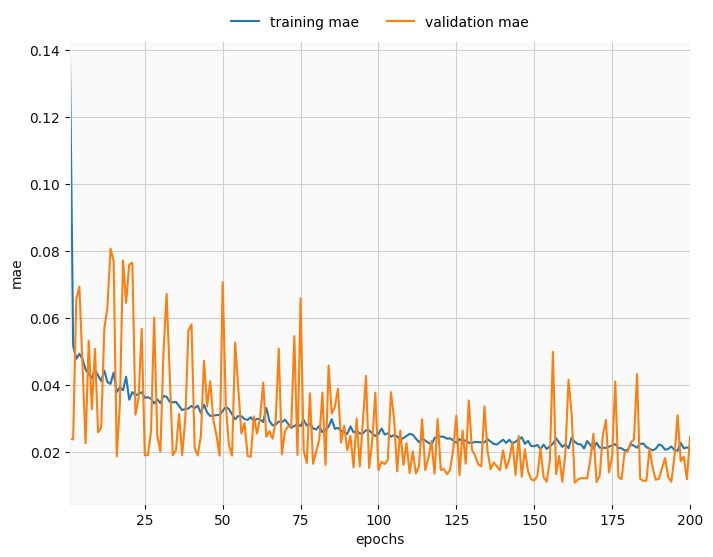

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['mae'])+1)

sns.lineplot(x=epochs, y=history.history['mae'],
              label='training mae', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_mae'],
              label='validation mae', ax=ax)

ax.set_ylabel('mae')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Evaluate

In [ ]:
eval = model.evaluate(X_test, y_test)

print(f'loss\t: {eval[0]:.3f}')
print(f'mae\t: {eval[1]:.3f}')

1/1 [==============================] - 0s 24ms/step - loss: 3.5778e-04 - mae: 0.0244
loss	: 0.000
mae	: 0.024


## Prediction on Train Data

In [ ]:
y_pred = model.predict(X_train)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_train_inverse = scaler['Open_scaler'].inverse_transform(y_train.reshape(-1,1))

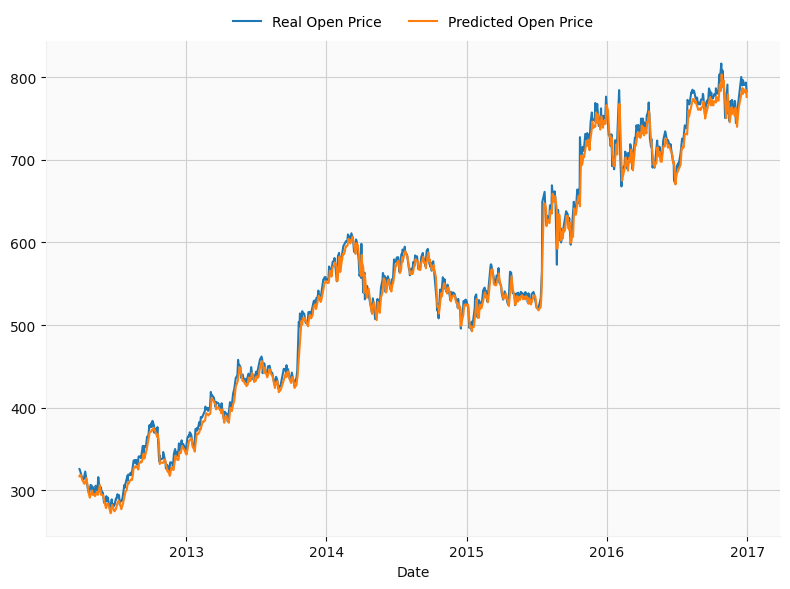

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train[60:].index, y=y_train_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_train[60:].index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
# ax.set_xticks(data_train[60:].index.date)
# ax.set_xticklabels(labels=data_train[60:].index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

## Prediction on Test Data

In [ ]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_test_inverse = scaler['Open_scaler'].inverse_transform(y_test.reshape(-1,1))

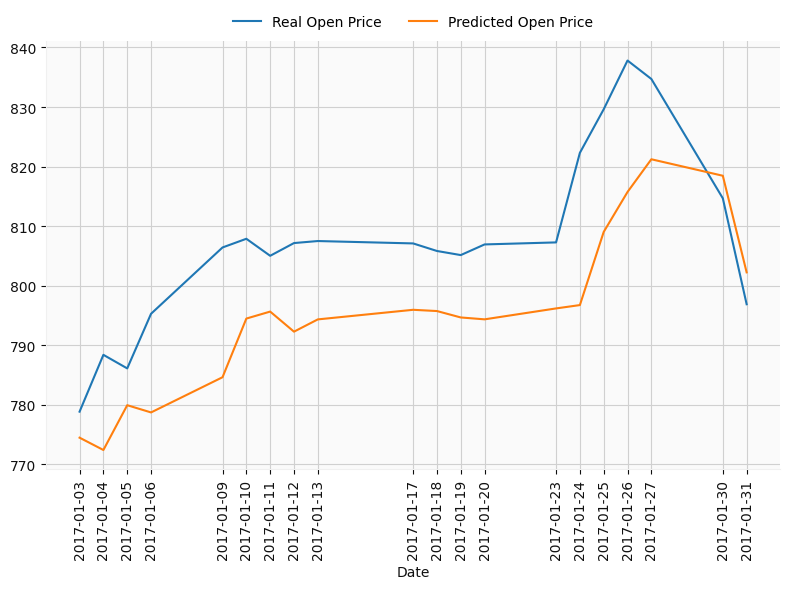

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_test.index, y=y_test_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_test.index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
ax.set_xticks(data_test.index.date)
ax.set_xticklabels(labels=data_test.index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

# Model Development (Bidirectional, SGD)

## Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_9 (Bidirectio  (None, 60, 128)          33792     
 nal)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 60, 128)           0         
                                                                 
 bidirectional_10 (Bidirecti  (None, 60, 128)          98816     
 onal)                                                           
                                                                 
 dropout_37 (Dropout)        (None, 60, 128)           0         
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              98816     
 onal)                                                           
                                                     

## Compile

I will use the Huber loss function. Read more about MSE, MAE, and Huber loss function [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss='huber',
              optimizer=optimizer,
              metrics=['mae'])

## Fit

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 11s 74ms/step - loss: 0.1303 - mae: 0.4414 - val_loss: 0.3582 - val_mae: 0.8460
Epoch 2/200
38/38 [==============================] - 1s 22ms/step - loss: 0.0930 - mae: 0.3616 - val_loss: 0.2786 - val_mae: 0.7460
Epoch 3/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0666 - mae: 0.3018 - val_loss: 0.2217 - val_mae: 0.6654
Epoch 4/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0504 - mae: 0.2602 - val_loss: 0.1800 - val_mae: 0.5994
Epoch 5/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0399 - mae: 0.2311 - val_loss: 0.1488 - val_mae: 0.5448
Epoch 6/200
38/38 [==============================] - 1s 21ms/step - loss: 0.0328 - mae: 0.2113 - val_loss: 0.1263 - val_mae: 0.5019
Epoch 7/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0287 - mae: 0.1967 - val_loss: 0.1095 - val_mae: 0.4672
Epoch 8/200
38/38 [==============================] - 1s 20ms/step - loss: 0

## History

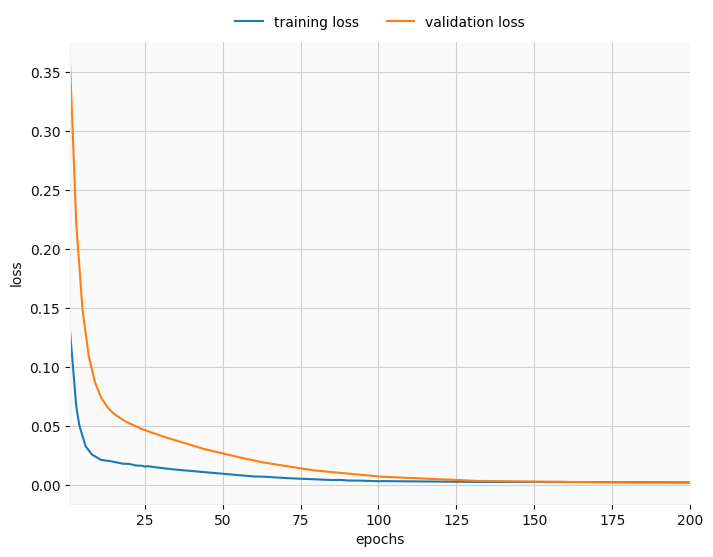

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'],
              label='training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'],
              label='validation loss', ax=ax)

ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

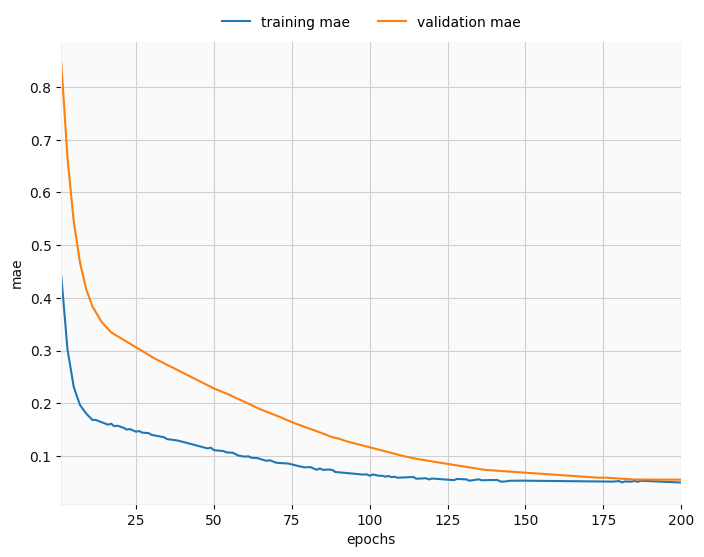

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['mae'])+1)

sns.lineplot(x=epochs, y=history.history['mae'],
              label='training mae', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_mae'],
              label='validation mae', ax=ax)

ax.set_ylabel('mae')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Evaluate

In [ ]:
eval = model.evaluate(X_test, y_test)

print(f'loss\t: {eval[0]:.3f}')
print(f'mae\t: {eval[1]:.3f}')

1/1 [==============================] - 0s 28ms/step - loss: 0.0019 - mae: 0.0549
loss	: 0.002
mae	: 0.055


## Prediction on Train Data

In [ ]:
y_pred = model.predict(X_train)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_train_inverse = scaler['Open_scaler'].inverse_transform(y_train.reshape(-1,1))

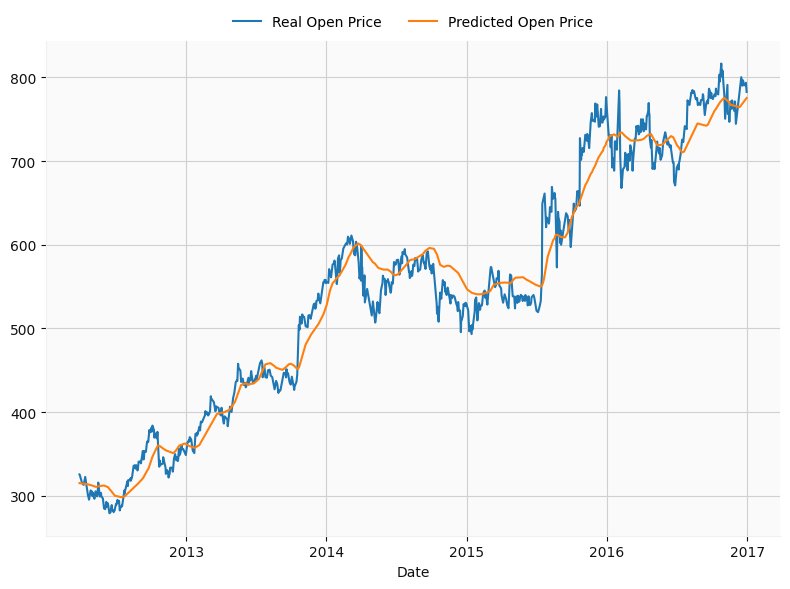

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train[60:].index, y=y_train_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_train[60:].index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
# ax.set_xticks(data_train[60:].index.date)
# ax.set_xticklabels(labels=data_train[60:].index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

## Prediction on Test Data

In [ ]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_test_inverse = scaler['Open_scaler'].inverse_transform(y_test.reshape(-1,1))

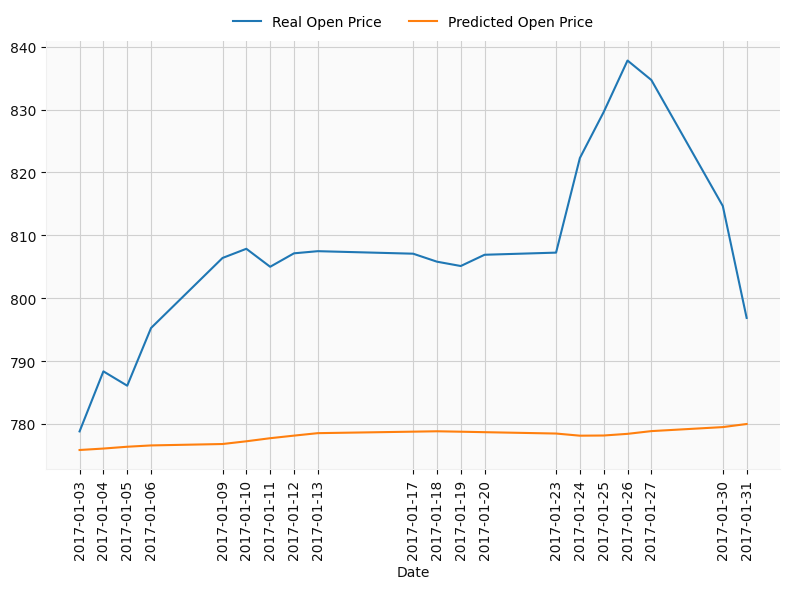

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_test.index, y=y_test_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_test.index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
ax.set_xticks(data_test.index.date)
ax.set_xticklabels(labels=data_test.index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

# Model Development (Bidirectional, Adam)

## Model Architecture

In [ ]:
model = tf.keras.models.Sequential([
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(64, return_sequences=False)),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_6 (Bidirectio  (None, 60, 128)          33792     
 nal)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 60, 128)           0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 60, 128)          98816     
 nal)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 60, 128)           0         
                                                                 
 bidirectional_8 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                     

## Compile

I will use the Huber loss function. Read more about MSE, MAE, and Huber loss function [here](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4, momentum=0.9)

model.compile(loss='huber',
              optimizer='adam',
              metrics=['mae'])

## Fit

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32, epochs=200)

Epoch 1/200
38/38 [==============================] - 16s 83ms/step - loss: 0.0152 - mae: 0.1167 - val_loss: 3.7374e-04 - val_mae: 0.0187
Epoch 2/200
38/38 [==============================] - 1s 22ms/step - loss: 0.0019 - mae: 0.0477 - val_loss: 0.0022 - val_mae: 0.0611
Epoch 3/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0017 - mae: 0.0453 - val_loss: 4.4426e-04 - val_mae: 0.0262
Epoch 4/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0015 - mae: 0.0412 - val_loss: 3.5304e-04 - val_mae: 0.0209
Epoch 5/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0013 - mae: 0.0381 - val_loss: 2.8066e-04 - val_mae: 0.0173
Epoch 6/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0013 - mae: 0.0377 - val_loss: 3.2904e-04 - val_mae: 0.0209
Epoch 7/200
38/38 [==============================] - 1s 20ms/step - loss: 0.0013 - mae: 0.0377 - val_loss: 0.0011 - val_mae: 0.0413
Epoch 8/200
38/38 [==============================] - 1s

## History

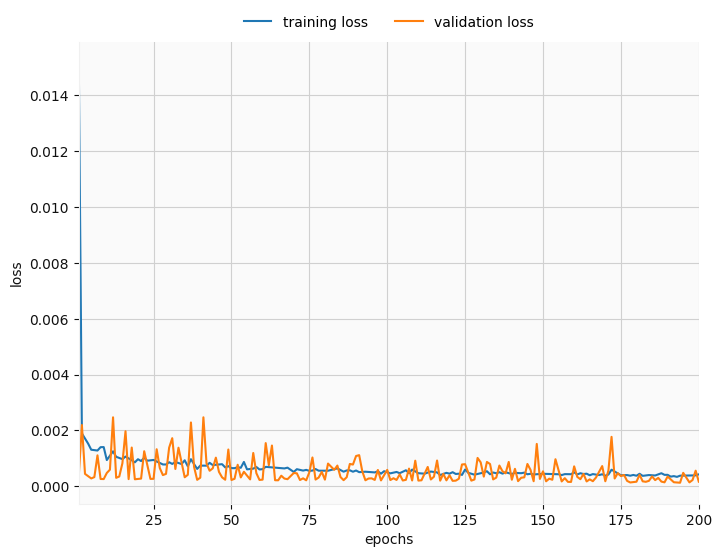

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'],
              label='training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'],
              label='validation loss', ax=ax)

ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

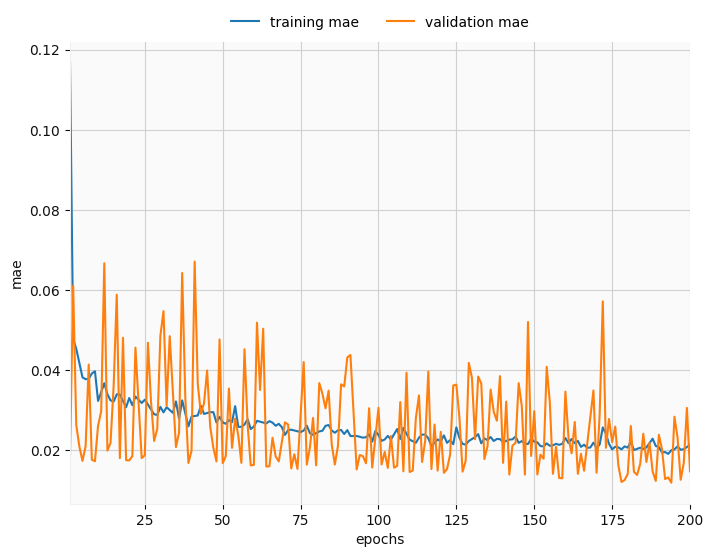

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1, len(history.history['mae'])+1)

sns.lineplot(x=epochs, y=history.history['mae'],
              label='training mae', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_mae'],
              label='validation mae', ax=ax)

ax.set_ylabel('mae')
ax.set_xlabel('epochs')
ax.set_xlim(1, len(epochs))

ax.legend(loc='lower center', 
        bbox_to_anchor=(0.5, 1), 
        title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Evaluate

In [ ]:
eval = model.evaluate(X_test, y_test)

print(f'loss\t: {eval[0]:.3f}')
print(f'mae\t: {eval[1]:.3f}')

1/1 [==============================] - 0s 29ms/step - loss: 1.6460e-04 - mae: 0.0147
loss	: 0.000
mae	: 0.015


## Prediction on Train Data

In [ ]:
y_pred = model.predict(X_train)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_train_inverse = scaler['Open_scaler'].inverse_transform(y_train.reshape(-1,1))

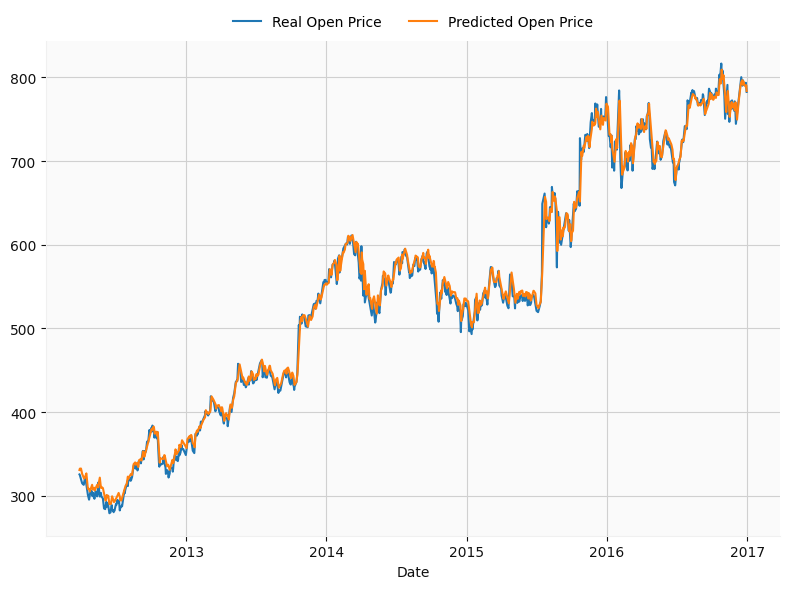

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_train[60:].index, y=y_train_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_train[60:].index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
# ax.set_xticks(data_train[60:].index.date)
# ax.set_xticklabels(labels=data_train[60:].index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

## Prediction on Test Data

In [ ]:
y_pred = model.predict(X_test)

y_pred_inverse = scaler['Open_scaler'].inverse_transform(y_pred)
y_test_inverse = scaler['Open_scaler'].inverse_transform(y_test.reshape(-1,1))

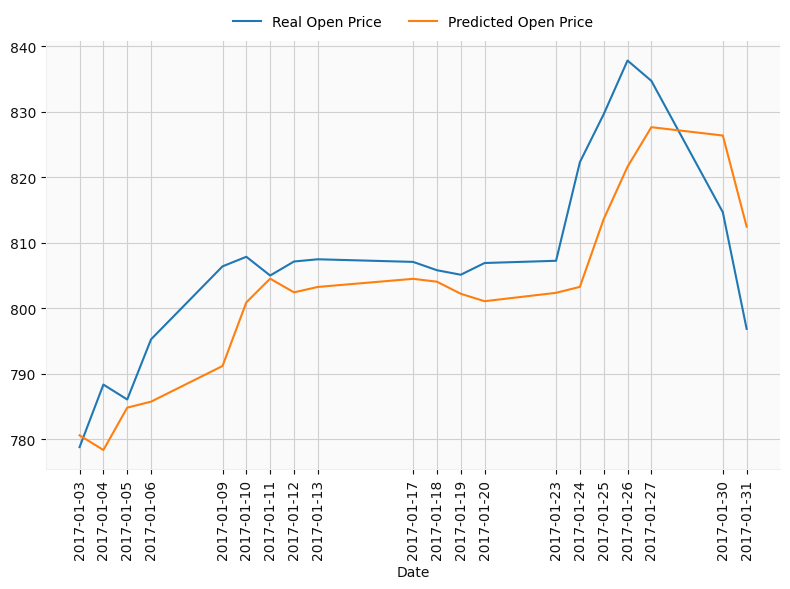

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x=data_test.index, y=y_test_inverse.flatten(), label='Real Open Price', ax=ax)
sns.lineplot(x=data_test.index, y=y_pred_inverse.flatten(), label='Predicted Open Price', ax=ax)

ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2, frameon=False)
ax.set_xticks(data_test.index.date)
ax.set_xticklabels(labels=data_test.index.date, rotation=90)

sns.despine()
plt.tight_layout()
plt.show()

# References

- George Seif. "Understanding the 3 most common loss functions for Machine Learning Regression". [source](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3)
- Wikipedia. "Huber Loss". [source](https://en.wikipedia.org/wiki/Huber_loss)